In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

# Directory containing JSON files
directory ='./Datasets/'

# Initialize an empty list to store DataFrame for each file
dfs = []

In [2]:
# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        
        # Read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Convert JSON data to DataFrame and append to the list
        df = pd.DataFrame(data)
        dfs.append(df)

In [3]:
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)
print(merged_df)

            type                                              entry  \
0     collection  {'fullUrl': 'urn:uuid:80bb41d3-ebb4-42e6-b087-...   
1     collection  {'fullUrl': 'urn:uuid:2c722ad1-5a59-4f6a-90cc-...   
2     collection  {'fullUrl': 'urn:uuid:593c21c4-8cce-47cd-bd70-...   
3     collection  {'fullUrl': 'urn:uuid:1f954180-ec49-455a-95aa-...   
4     collection  {'fullUrl': 'urn:uuid:556966e3-42a8-4359-838a-...   
...          ...                                                ...   
2441  collection  {'fullUrl': 'urn:uuid:1102d6e4-724c-4593-bbc4-...   
2442  collection  {'fullUrl': 'urn:uuid:6643ee4f-9fa9-430f-a456-...   
2443  collection  {'resource': {'status': 'completed', 'date': '...   
2444  collection  {'resource': {'status': 'active', 'category': ...   
2445  collection  {'fullUrl': 'urn:uuid:f72f7612-7acd-4dbd-b736-...   

     resourceType  
0          Bundle  
1          Bundle  
2          Bundle  
3          Bundle  
4          Bundle  
...           ...  
2441   

In [4]:
print(merged_df.columns)

Index(['type', 'entry', 'resourceType'], dtype='object')


In [5]:
# print(entry['resource'])


In [21]:
import os
import json
import pandas as pd

# Directory containing the JSON files
directory = './Datasets/'

# List to hold all patient details
patients = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        
        # Open and load the JSON file
        with open(filepath, 'r') as file:
            data = json.load(file)
            
            # Extract patient details from the current JSON file
            for entry in data.get('entry', []):
                resource = entry.get('resource', {})
                name_info = resource.get('name', [{}])[0]
                address_info = resource.get('address', [{}])[0]
                marital_status_info = resource.get('maritalStatus', {}).get('coding', [{}])[0]
                
                patient = {
                    'name': ' '.join(name_info.get('given', [''])) + ' ' + name_info.get('family', ''),
                    'gender': resource.get('gender', ''),
                    'birth_date': resource.get('birthDate', ''),
                    'marital_status': marital_status_info.get('code', ''),
                    'address': address_info.get('city', ''),
                    'state': address_info.get('state', '')
                }
                patients.append(patient)

# Create a DataFrame from the list of patient details
df = pd.DataFrame(patients, columns=['name', 'gender', 'birth_date', 'marital_status', 'city', 'state'])

# Save the DataFrame to a CSV file
csv_file = 'patients.csv'
df.to_csv(csv_file, index=False)

print(f'CSV file created: {csv_file}')


CSV file created: patients.csv


In [7]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('patients.csv')

# Display the DataFrame
print(df)


                      name  gender  birth_date marital_status         city  \
0     Zachary691 Willms133  female  1959-08-09              M   Shrewsbury   
1                              NaN         NaN            NaN          NaN   
2                              NaN         NaN            NaN          NaN   
3                              NaN         NaN            NaN          NaN   
4                              NaN         NaN            NaN          NaN   
...                    ...     ...         ...            ...          ...   
2441                           NaN         NaN            NaN          NaN   
2442                           NaN         NaN            NaN          NaN   
2443                           NaN         NaN            NaN          NaN   
2444                           NaN         NaN            NaN          NaN   
2445  Lavon303 Medhurst137  female  1926-12-20              M  Easthampton   

     state  
0       MA  
1      NaN  
2      NaN  
3      NaN 

In [8]:
# removing the nan values
# Drop rows with any NaN values
df_cleaned = df.dropna()
# Save the cleaned DataFrame to a CSV file
cleaned_csv_file = 'patients_cleaned.csv'
df_cleaned.to_csv(cleaned_csv_file, index=False)

print(f'Cleaned CSV file created: {cleaned_csv_file}')

Cleaned CSV file created: patients_cleaned.csv


In [9]:
cleaned_data=pd.read_csv("patients_cleaned.csv")
print(cleaned_data)

                       name  gender  birth_date marital_status         city  \
0      Zachary691 Willms133  female  1959-08-09              M   Shrewsbury   
1        Sunny577 Pouros268  female  1953-07-25              S      Andover   
2        Sylvia645 Reilly26    male  1938-02-07              M       Malden   
3       Victor933 Kuphal285  female  1935-01-13              M      Peabody   
4        Robbie863 Kling491  female  1929-05-12              M    Leicester   
5        Bart857 Schaden124    male  1949-03-23              M    Worcester   
6         Evan434 Klocko280  female  1944-02-12              S         Lynn   
7     Mario387 Gulgowski637    male  1932-09-17              M         Lynn   
8        Jada527 Gerhold466  female  1962-08-20              M     Abington   
9       Casimer719 Hyatt334  female  1988-08-01              M     Stoneham   
10   Jaydon948 Langworth344  female  1943-12-18              M     Brockton   
11      Viviane880 Kunde450    male  1971-08-08     

In [10]:
import pandas as pd

# Load the cleaned data from the CSV file
cleaned_data = pd.read_csv("patients_cleaned.csv")

# Print the cleaned data
print(cleaned_data)

# Define the name of the Excel file to save the cleaned data
cleaned_excel_file = 'patients_cleaned.xlsx'

# Save the cleaned data to an Excel file
cleaned_data.to_excel(cleaned_excel_file, index=False)

# Print a confirmation message
print(f'Cleaned Excel file created: {cleaned_excel_file}')


                       name  gender  birth_date marital_status         city  \
0      Zachary691 Willms133  female  1959-08-09              M   Shrewsbury   
1        Sunny577 Pouros268  female  1953-07-25              S      Andover   
2        Sylvia645 Reilly26    male  1938-02-07              M       Malden   
3       Victor933 Kuphal285  female  1935-01-13              M      Peabody   
4        Robbie863 Kling491  female  1929-05-12              M    Leicester   
5        Bart857 Schaden124    male  1949-03-23              M    Worcester   
6         Evan434 Klocko280  female  1944-02-12              S         Lynn   
7     Mario387 Gulgowski637    male  1932-09-17              M         Lynn   
8        Jada527 Gerhold466  female  1962-08-20              M     Abington   
9       Casimer719 Hyatt334  female  1988-08-01              M     Stoneham   
10   Jaydon948 Langworth344  female  1943-12-18              M     Brockton   
11      Viviane880 Kunde450    male  1971-08-08     

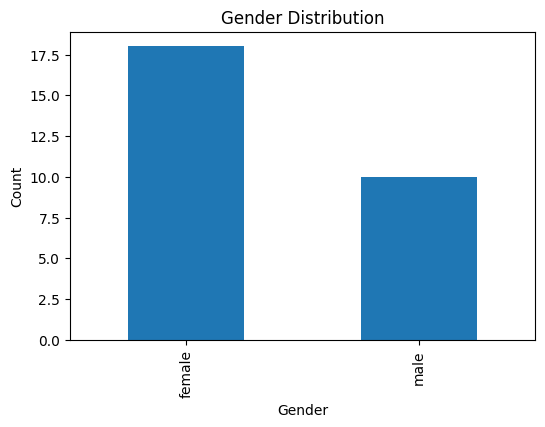

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Gender Distribution
plt.figure(figsize=(6, 4))
cleaned_data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


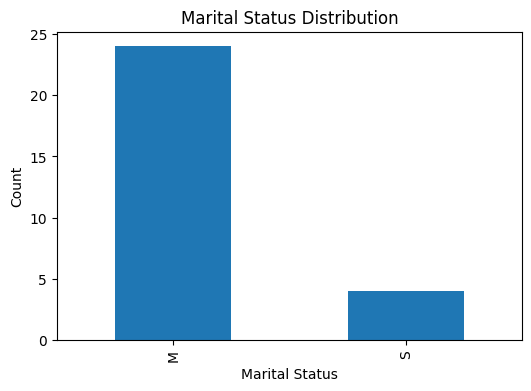

In [12]:
# Marital Status Distribution
plt.figure(figsize=(6, 4))
cleaned_data['marital_status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [13]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'birth_date' is a column containing birth dates in string format
# Convert 'birth_date' column to Timestamp format
cleaned_data['birth_date'] = pd.to_datetime(cleaned_data['birth_date'])

# Calculate age based on current timestamp and 'birth_date' column
cleaned_data['age'] = (pd.Timestamp.now() - cleaned_data['birth_date']).dt.days
cleaned_data['age_years'] = cleaned_data['age'] / 365.25

print(cleaned_data['age_years'])

0      64.799452
1      70.839151
2      86.299795
3      89.368925
4      95.041752
5      75.178645
6      80.287474
7      91.690623
8      61.768652
9      35.819302
10     80.440794
11     52.802190
12    102.694045
13     45.954825
14    116.240931
15     69.240246
16     48.736482
17     77.182752
18     41.125257
19     93.341547
20     83.422313
21     44.243669
22     36.706366
23     75.972621
24    114.034223
25     41.911020
26     70.116359
27     97.434634
Name: age_years, dtype: float64


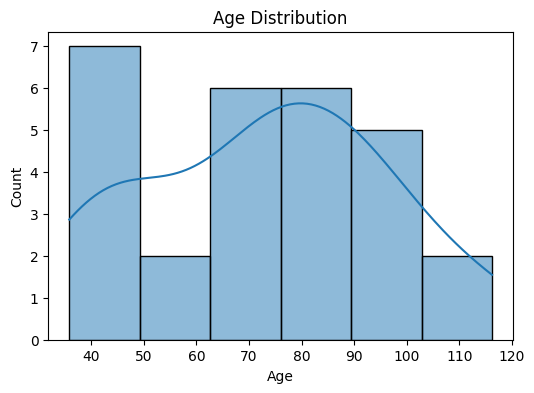

In [14]:
# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_data['age_years'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


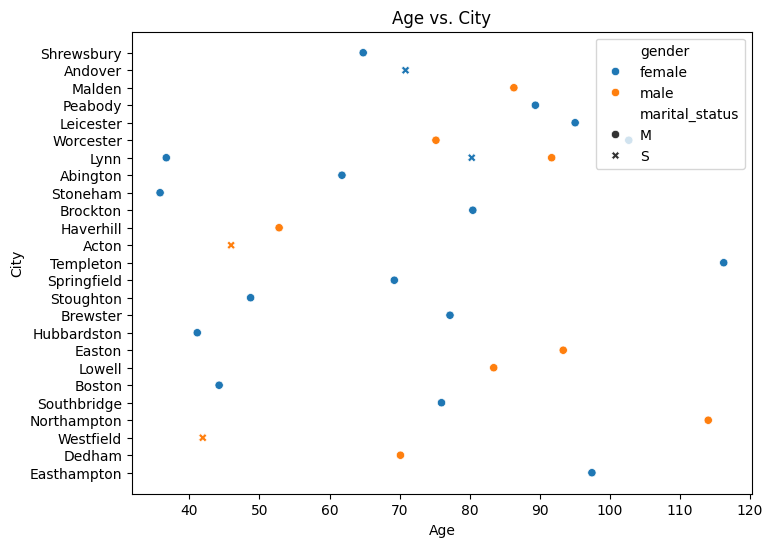

In [15]:
# Scatter Plot: Age vs. City
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age_years', y='city', data=cleaned_data, hue='gender', style='marital_status')
plt.title('Age vs. City')
plt.xlabel('Age')
plt.ylabel('City')
plt.show()

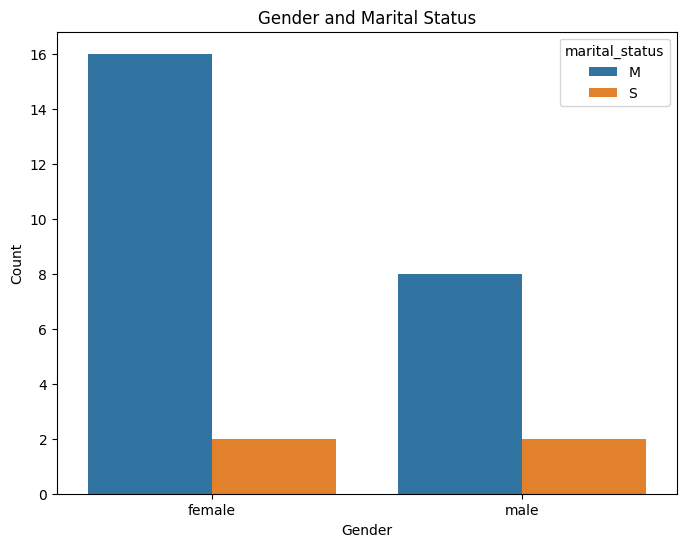

In [16]:
# Grouped Bar Chart: Gender and Marital Status
plt.figure(figsize=(8, 6))
grouped = cleaned_data.groupby(['gender', 'marital_status']).size().reset_index(name='count')
sns.barplot(x='gender', y='count', hue='marital_status', data=grouped)
plt.title('Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

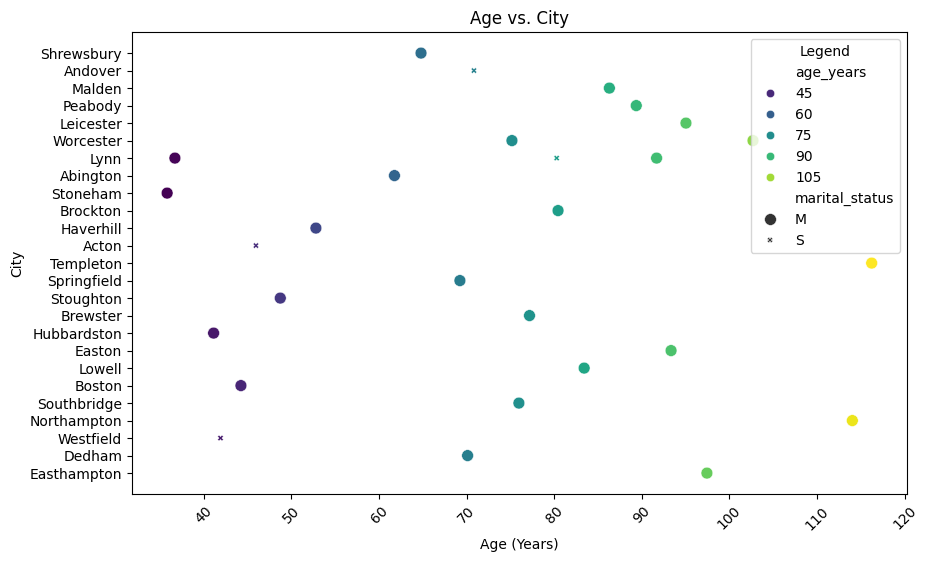

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your prepared dataframe
def truncate_city_name(city_name, max_length=20):
  if len(city_name) > max_length:
    return city_name[:max_length] + "..."
  else:
    return city_name
plt.figure(figsize=(10, 6))

# Assuming 'cleaned_data' is your prepared dataframe

sns.scatterplot(
    x='age_years',
    y='city',
    data=cleaned_data,
    hue='age_years',  # Color by age using a colormap
    style='marital_status',  # Marker style by marital status (optional)
    size='marital_status',  # Marker size by marital status (optional)
    palette='viridis'  # Choose a colormap (adjust based on your preference)
)

# Get unique city names (assuming they represent tick positions)
unique_cities = cleaned_data['city'].unique()

# Set y-axis ticks and labels together
plt.yticks(unique_cities, [truncate_city_name(name) for name in unique_cities])

# Truncate long city names for label display (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Age vs. City')
plt.xlabel('Age (Years)')
plt.ylabel('City')
plt.legend(title='Legend')  # Add legend title
plt.show()


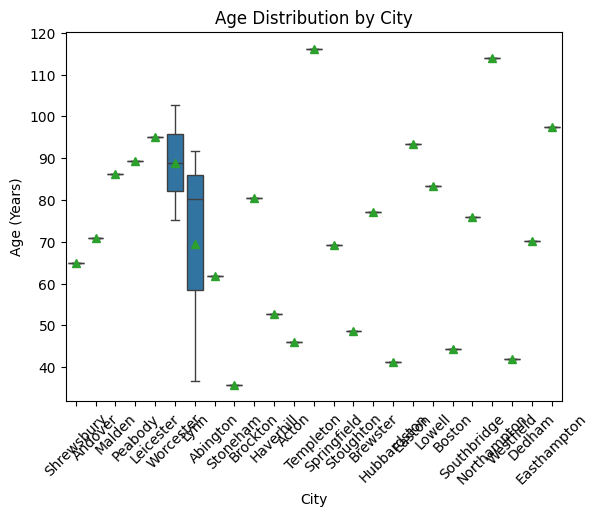

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your prepared dataframe

sns.boxplot(
    x = "city",
    y = "age_years",
    showmeans=True,  # Show mean as well (optional)
    data=cleaned_data
)

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Age Distribution by City')
plt.xlabel('City')
plt.ylabel('Age (Years)')
plt.show()


In [19]:
city_patient_counts = cleaned_data.groupby('city')['name'].count()

# Find the city with the highest number of patients
city_with_most_patients = city_patient_counts.idxmax()
highest_patient_count = city_patient_counts.max()

print("City with the highest number of patients:", city_with_most_patients)
print("Number of patients in", city_with_most_patients, ":", highest_patient_count)

City with the highest number of patients: Lynn
Number of patients in Lynn : 3
